In [83]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [84]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [85]:
#data
df = pd.read_csv("https://raw.githubusercontent.com/Aman240499/NLP/main/spam%20(1).csv",encoding = "latin-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [86]:
df.drop(columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace = True)

In [87]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [88]:
df["v1"].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

<Axes: xlabel='v1', ylabel='count'>

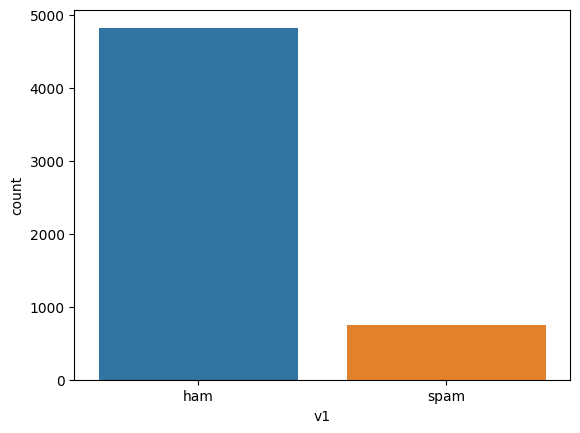

In [89]:
sns.countplot(x = df["v1"])

In [90]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [91]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [92]:
df["Length"] = df["v2"].apply(len)

In [93]:
df

,v1,v2,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

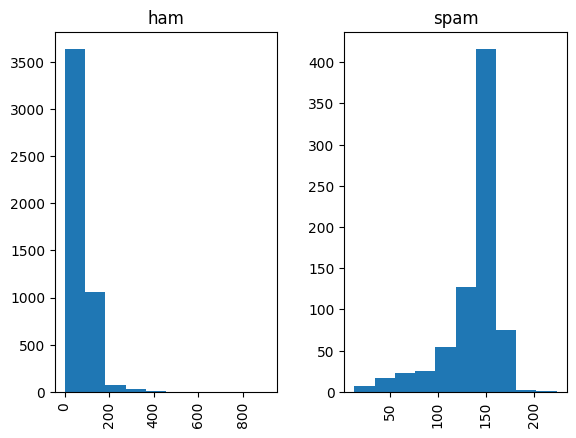

In [94]:
df.hist(column = "Length",by= "v1")

# **Labling 0 and 1 but another approch**

In [95]:
df["Label"] = df["v1"].map({"ham":0,"spam":1})

In [96]:
df

,v1,v2,Length,Label
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,1
5568,ham,Will Ì_ b going to esplanade fr home?,37,0
5569,ham,"Pity, * was in mood for that. So...any other s...",57,0
5570,ham,The guy did some bitching but I acted like i'd...,125,0


In [97]:
#ham and spam email
Ham = df[df["v1"]=="ham"]
Spam = df[df["v1"]=="spam"]



In [98]:
Ham

,v1,v2,Length,Label
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0
6,ham,Even my brother is not like to speak with me. ...,77,0
...,...,...,...,...
5565,ham,Huh y lei...,12,0
5568,ham,Will Ì_ b going to esplanade fr home?,37,0
5569,ham,"Pity, * was in mood for that. So...any other s...",57,0
5570,ham,The guy did some bitching but I acted like i'd...,125,0


In [99]:
Spam

,v1,v2,Length,Label
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,148,1
8,spam,WINNER!! As a valued network customer you have...,158,1
9,spam,Had your mobile 11 months or more? U R entitle...,154,1
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,1
...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,1
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,1
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,1
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,1


# **WordCld function**

In [100]:
def Wordcld(data,Heading):
  txt = " ".join(df["v2"])
  wc = WordCloud(background_color="white",height = 500,width = 700).generate(txt)
  plt.imshow(wc)
  plt.axis("off")
  plt.title(Heading,size = 45)

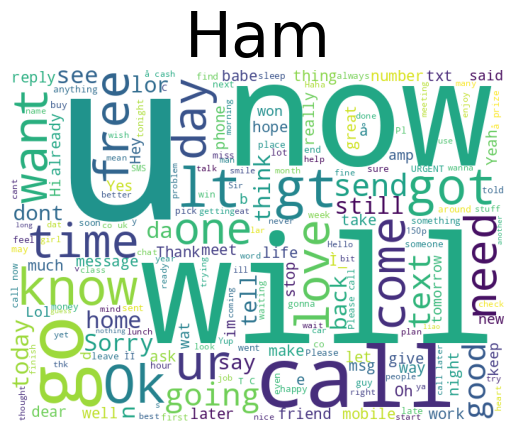

In [101]:
Wordcld(Ham,"Ham")

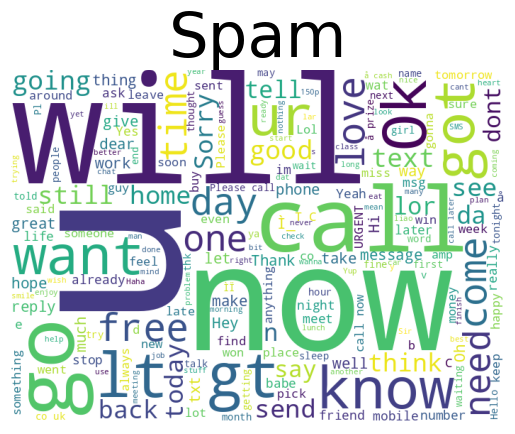

In [102]:
Wordcld(Spam,"Spam")

# **Text Cleaning**

1.Remove Unwanted Charters

2.Text Normalization

3.Tokenization

4.lemmatization

5.Join The Text


In [103]:
lemma = WordNetLemmatizer()

In [104]:
corpus = []

for i in range(len(df)):
  msg = re.sub("[^a-zA-Z]"," ",df["v2"][i])
  msg = msg.lower()
  msg = msg.split()
  msg = [lemma.lemmatize(i) for i in msg if i not in stopwords.words("english")]
  msg = " ".join(msg)
  corpus.append(msg)

In [105]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

# **Feature Extraction**

# **1.Binary Weight**

In [106]:
cv = CountVectorizer(binary = True)
x = cv.fit_transform(corpus)
x

<5572x7021 sparse matrix of type '<class 'numpy.int64'>'
	with 44834 stored elements in Compressed Sparse Row format>

In [107]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [108]:
cv.vocabulary_

{'go': 2448,
 'jurong': 3163,
 'point': 4546,
 'crazy': 1329,
 'available': 429,
 'bugis': 819,
 'great': 2521,
 'world': 6858,
 'la': 3275,
 'buffet': 817,
 'cine': 1079,
 'got': 2484,
 'amore': 208,
 'wat': 6668,
 'ok': 4182,
 'lar': 3304,
 'joking': 3133,
 'wif': 6772,
 'oni': 4208,
 'free': 2275,
 'entry': 1897,
 'wkly': 6821,
 'comp': 1185,
 'win': 6783,
 'fa': 2027,
 'cup': 1385,
 'final': 2135,
 'tkts': 6200,
 'st': 5719,
 'may': 3666,
 'text': 6077,
 'receive': 4901,
 'question': 4801,
 'std': 5756,
 'txt': 6373,
 'rate': 4852,
 'apply': 290,
 'dun': 1758,
 'say': 5206,
 'early': 1778,
 'hor': 2780,
 'already': 181,
 'nah': 3942,
 'think': 6126,
 'usf': 6502,
 'life': 3384,
 'around': 338,
 'though': 6145,
 'freemsg': 2281,
 'hey': 2703,
 'darling': 1439,
 'week': 6708,
 'word': 6851,
 'back': 468,
 'like': 3396,
 'fun': 2330,
 'still': 5778,
 'tb': 6019,
 'xxx': 6928,
 'chgs': 1035,
 'send': 5289,
 'rcv': 4863,
 'even': 1945,
 'brother': 793,
 'speak': 5644,
 'treat': 6311,
 '

In [109]:
y = df["Label"]

In [110]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=1)

In [111]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)
print(f"training accuracy : {nb.score(xtrain,ytrain)}\nTesting Accuracy {nb.score(xtest,ytest)}")

training accuracy : 0.9923715503702042
Testing Accuracy 0.9820627802690582


# **2.BAG OF WORDS**

In [112]:
cv = CountVectorizer()
x = cv.fit_transform(corpus)
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [113]:
x

<5572x7021 sparse matrix of type '<class 'numpy.int64'>'
	with 44834 stored elements in Compressed Sparse Row format>

In [114]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=1)

In [115]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)
print(f"training accuracy : {nb.score(xtrain,ytrain)}\nTesting Accuracy {nb.score(xtest,ytest)}")

training accuracy : 0.9919228180390397
Testing Accuracy 0.9811659192825112


# **3.Tf-IDF**

In [116]:
tf = TfidfVectorizer()
x = tf.fit_transform(corpus)
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [117]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=1)

In [118]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)
print(f"training accuracy : {nb.score(xtrain,ytrain)}\nTesting Accuracy {nb.score(xtest,ytest)}")

training accuracy : 0.9771146511106125
Testing Accuracy 0.9775784753363229
